# Matplotlib
## Introduction

Matplotlib is a library for producing publication-quality figures. mpl (for short) was designed from the beginning to serve two purposes: 

 1. allow for interactive, cross-platform control of figures and plots
 2. make it easy to produce static raster or vector graphics files without the need for any GUIs. 
 
Furthermore, mpl -- much like Python itself -- gives the developer complete control over the appearance of their plots, while still being very usable through a powerful defaults system.

# Pyplot: python plotting for matlab users

`matplotlib.pyplot` is a set of functions that has a similar functionality as MATLAB. 

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
x = np.arange(0,5,.1)
y = x**2

(0, 25)

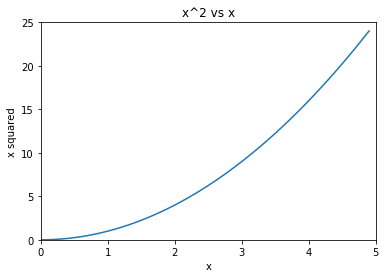

In [4]:
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("x squared")
plt.title("x^2 vs x")
plt.xlim(0, 5)
plt.ylim(0, 25)

<div class="alert alert-block alert-info">
    <b>Exercise 1</b><p>Try it out: Make a plot! Need some ideas?</p>
    <ol>
        <li> Plot $y$ vs $x^3$
        <li> Plot $y$ vs $cos(x)$
        <li> Plot $sin(x)$ and $cos(x)$ on the same plot.
    </ol>
</div>

You can add style using format strings (just like MATLAB) or using specific keyword arguments. The example below using a format string,

    fmt = '[marker][line][color]'
    

Common keyword arguments are:

* `color`: Line and marker color. Example: `'blue'` (More on colors later...)
* `linestyle` or `ls`: Line style. Examples: `'-'`, `'--'`, `'-.'`, `':'`
* `linewidth` or `lw`: Line width. Example: `2`
* `marker`: The marker style. Examples: `'o'`, `'.'`, `'v'`, `'s'`, `'*'`
* `markersize` or `ms`: Size of the marker. Example: `12`

[More Keyword arguments for `plt.plot`](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html)

Text(0, 0.5, '$x^2$')

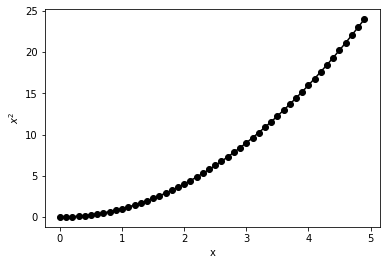

In [5]:
plt.plot(x, y, '.-k', markersize=12)
plt.xlabel("x")
plt.ylabel("$x^2$")

You can also use latex in the text (as shown above, `$x^2$`)!
<div class="alert alert-block alert-info">
    <b>Exercise 2</b><p>Try it out: Modify the style of your plot. Need some ideas?</p>
    <ol>
        <li> Make the line thicker.
        <li> Remove the line and use only markers.
        <li> Change the marker style to triangles.
    </ol>
</div>


## More colors!

There are *so* many ways to define colors in matplotlib:

* RGB or RGBAA tuple: (0.1, 0.2, 0.5) or (0.1, 0.2, 0.5, 0.8)
* Hex RGB or RGBA string: “#0F0F0F” or “#0F0F0F0F”
* Grayscale value: “0.5” 
* String shortcuts: “b”, “g”, “r”, “c”, “m”, “y”, “k”, “w”
* X11/CS4 color names: “blue”, “green”, “goldenrod”, ...
* [Xkcd color survey](https://blog.xkcd.com/2010/05/03/color-survey-results/): “xkcd:sky blue”
* CN color (matplotlib line colors): “C0”, “C1”, … “C9”
* Tableau colors: “tab:green”, etc.

![XKCD color survey examples](https://i1.wp.com/imgs.xkcd.com/blag/assorted_colors.png?zoom=2)

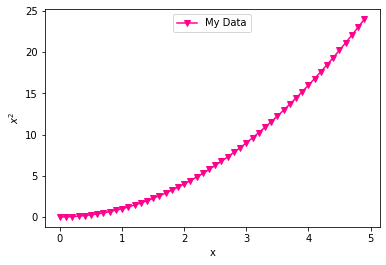

In [6]:
plt.plot(x, y, marker='v', color="xkcd:hot pink", label="My Data")
plt.xlabel("x")
plt.ylabel("$x^2$")
plt.legend(loc='upper center')

### Choose your own (data) adventure!

You can either load your own dataset, or use the code below to load a sample dataset.

Load your own data:

In [7]:
import pandas as pd

# Your code here...

df = None

Or use the [horror movie dataset](https://github.com/rfordatascience/tidytuesday/tree/master/data/2019/2019-10-22)

![hocus pocus](https://media.giphy.com/media/NGDSQlPJiWImc/giphy.gif)

In [48]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-10-22/horror_movies.csv")
#df = pd.read_csv("data/horror_movies.csv")

df.columns

Index(['title', 'genres', 'release_date', 'release_country', 'movie_rating',
       'review_rating', 'movie_run_time', 'plot', 'cast', 'language',
       'filming_locations', 'budget'],
      dtype='object')

<div class="alert alert-block alert-info">
    <b>Exercise 3</b><p>Try it out: Make a visualization using the data. Need some ideas?</p>
    <ol>
        <li> How has the number of horror movies released per year changed over time?
        <li> Have horror movies received better ratings over time?
        <li> How has the average rating of horror movies about witches compare to the average rating of all horror movies? (Or choose another plot component.)
    </ol>
</div>

The below cells wrangle new columns that you might find useful in your visualizations. Use these or create your own.

Get the year released:

In [14]:
df['year_released'] = pd.to_datetime(df['release_date']).map(lambda d: d.year)

Check if a particular sub-string (in this case, `witch`) is present in the `plot` column:

In [15]:
df['has_witches'] = df['plot'].str.contains('witch')

Split the budget column into two: one for the currency label, and one for the amount.

In [46]:
budget_split_columns = df['budget'].str.extract('([^0-9]*)([0-9.,]*)')
budget_split_columns[budget_split_columns[1].notnull()].head()

,0,1
1,$,"30,000"
5,$,"3,400,000"
11,$,"7,000"
14,INR,"6,000,000"
15,$,"150,000"


The currency column looks good, but we still need to remove the commas from the amount column to make it numerical! Let's do that, and save both columns as new columns in the original dataframe.

In [47]:
df["budget_currency"] = budget_split_columns[0]
df["budget_amount"] = budget_split_columns[1].str.replace(",", "").astype("float")

### Example Solutions

There are no wrong answers! Some example visualizations are shown below the comic.

![comic from xkcd](https://imgs.xkcd.com/comics/self_description.png)

**Exercise 3.1** The number of horror movies created has increased over time.

Text(0, 0.5, 'Number of movies')

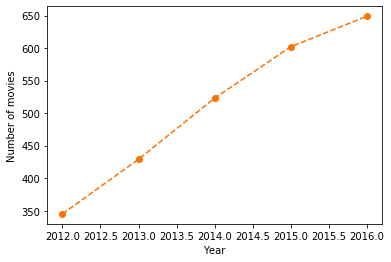

In [124]:
years = np.arange(df['year_released'].min(), df['year_released'].max())
total_count = [df[df['year_released']==y].shape[0] for y in years]
plt.plot(years, total_count, 'o--', c='xkcd:orange', label="total")
plt.xlabel("Year")
plt.ylabel("Number of movies")

**Exercise 3.2** Movie ratings have remained mostly flat over time.

(1, 10)

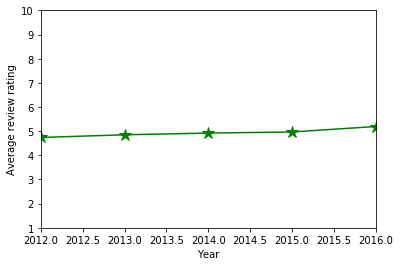

In [165]:
years = np.arange(df['year_released'].min(), df['year_released'].max())
avg_rating = [df[df['year_released']==y]['review_rating'].mean() for y in years]
plt.plot(years, avg_rating, '*-', c='green', ms='12')
plt.xlabel("Year")
plt.ylabel("Average review rating")
plt.xlim(years[0], years[-1])
plt.ylim(1, 10)

**Exercise 3.3** 2014 was a great year for movies about witches:

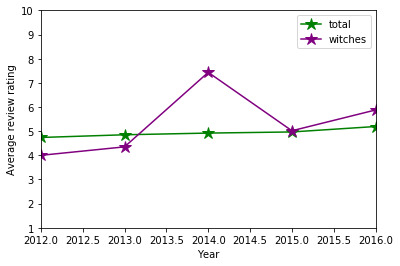

In [163]:
years = np.arange(df['year_released'].min(), df['year_released'].max())
avg_rating = [df[df['year_released']==y]['review_rating'].mean() for y in years]
avg_rating_witches = [df[(df['year_released']==y) & (df['has_witches'])]['review_rating'].mean() for y in years]
plt.plot(years, avg_rating, '*-', c='green', label="total", ms='12')
plt.plot(years, avg_rating_witches, '*-', c='purple', label='witches', ms='12')
plt.xlabel("Year")
plt.ylabel("Average review rating")
plt.xlim(years[0], years[-1])
plt.ylim(1, 10)
plt.legend()